In [1]:
import pandas as pd
import numpy as np
from scipy import stats
Bayesian2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/Bayesian2.csv")
Bayesian2 = Bayesian2.drop(columns=['Unnamed: 0'])
Bayesian2=Bayesian2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 1
Bayesian2 = Bayesian2.drop(Bayesian2.index[:rows_to_drop])

Random2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/Random2.csv")
Random2 = Random2.drop(columns=['Unnamed: 0'])
Random2=Random2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 10
Random2 = Random2.drop(Random2.index[:rows_to_drop])

greedy2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/greedy2.csv")
greedy2 = greedy2.drop(columns=['Unnamed: 0'])
greedy2=greedy2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 4
greedy2 = greedy2.drop(greedy2.index[:rows_to_drop])


hyperband2=pd.read_csv("/content/drive/MyDrive/Capsotn3/Capstone/Data/hyperband2.csv")
hyperband2 = hyperband2.drop(columns=['Unnamed: 0'])
hyperband2=hyperband2.sort_values(by='val_Loss', ascending=False)
rows_to_drop = 8
hyperband2 = hyperband2.drop(hyperband2.index[:rows_to_drop])

In [2]:
df=Random2

In [3]:
df

,layer_block_1/Layer_1,layer_block_1/activation_1,layer_block_1/Layer_2,layer_block_1/activation_2,classification_head_1/spatial_reduction_1/reduction_type,classification_head_1/dropout,optimizer,learning_rate,val_Loss
77,160,tanh,32,sigmoid,global_max,0.50,adam_weight_decay,0.00010,2.555485
46,160,relu,320,sigmoid,global_max,0.50,adam,0.00001,2.552856
36,992,sigmoid,256,tanh,global_avg,0.00,adam,0.01000,2.552197
140,512,relu,192,sigmoid,global_max,0.50,sgd,0.00001,2.543718
109,64,relu,704,sigmoid,global_avg,0.50,sgd,0.00001,2.512519
...,...,...,...,...,...,...,...,...,...
85,640,tanh,928,relu,flatten,0.50,adam_weight_decay,0.00002,2.032161
122,416,relu,128,tanh,flatten,0.25,adam_weight_decay,0.01000,1.973933
48,192,relu,288,tanh,flatten,0.50,sgd,0.01000,1.952545
15,64,tanh,128,relu,flatten,0.00,adam_weight_decay,0.01000,1.921584


In [ ]:
mean, std = df['val_Loss'].mean(), df['val_Loss'].std()

In [ ]:
print(len(df),mean,std)


200 248.33108581364155 2355.230278449975


In [ ]:
df=df[(np.abs(stats.zscore(df['val_Loss'])) < 0.15)]
mean, std = df['val_Loss'].mean(), df['val_Loss'].std()
print(len(df),mean,std)



197 2.6423631059336783 3.016658456431486


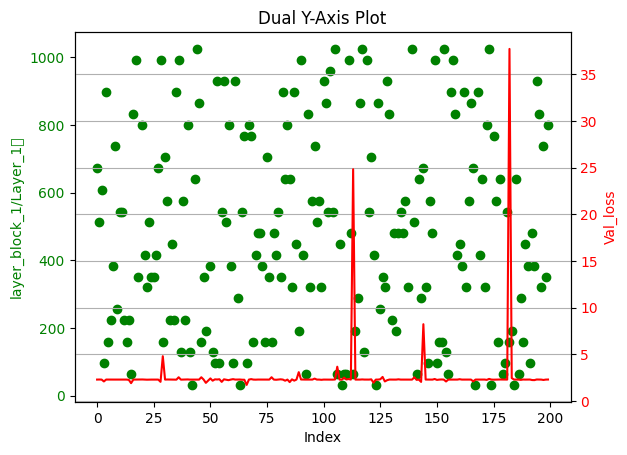

In [ ]:
import matplotlib.pyplot as plt

# Your data
x = df.index
y1 = df['layer_block_1/Layer_1']
y2 = df['val_Loss']

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
ax1.scatter(x, y1, label='layer_block_1/Layer_1', color='g')
ax1.set_xlabel('Index')
ax1.set_ylabel('layer_block_1/Layer_1	', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
ax2.plot(x, y2, label='Val_loss', color='r')
ax2.set_ylabel('Val_loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2


# Show the plot
plt.grid(True)
plt.title('Dual Y-Axis Plot')
plt.show()
